# **1. 결정 트리**

- 3주차 branch에 있는 `car_evaluation.csv`를 다운받은 후 실습을 진행해 주세요.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **1-a. 'car_evaluation.csv'를 불러와 df에 저장해 주세요.**

In [1]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')

## **1-b. df의 상위 5개 행을 확인해 주세요.**

In [8]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-c. ```info()```를 통해 데이터 정보를 확인해 주세요.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## **1-d. 컬럼명이 적절해 보이지 않네요. 컬럼명을 알맞게 변경해 주세요.**


In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

print(df.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [12]:
# 데이터 재확인

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-e. 범주형 변수에 대해 Label Encoding을 수행해 주세요.**
- Hint: 파머완 p.118, 121~122

In [15]:
# 범주형 변수 리스트
cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# LabelEncoder 객체 생성
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# 각 범주형 변수에 대해 레이블 인코딩 수행
df['Buying_Price'] = label_encoder.fit_transform(df['buying'])

df['Maintenance_Cost'] = label_encoder.fit_transform(df['maint'])


In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class,Buying_Price,Maintenance_Cost
0,vhigh,vhigh,2,2,small,med,unacc,3,3
1,vhigh,vhigh,2,2,small,high,unacc,3,3
2,vhigh,vhigh,2,2,med,low,unacc,3,3
3,vhigh,vhigh,2,2,med,med,unacc,3,3
4,vhigh,vhigh,2,2,med,high,unacc,3,3


## **1-f. Feature(X)와 Target(y)를 분리해 주세요.**
- target(y) 변수: class

In [18]:
X =df.drop(columns=['class'])
y =df['class']

## **1-g. ```train_test_split()```을 사용하여 훈련 세트와 테스트 세트로 나눠주세요.**
(random_state = 42, train: test = 8:2)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#왜 안돼지ㅜㅠㅠㅠㅠ

NameError: ignored

## **1-h. ```DecisionTreeClassifier```를 사용해 훈련 데이터를 fit 한 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
clf = DecisionTreeClassifier(random_state=42)


ValueError: ignored

## **1-i. GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.**
- Hint: 파머완 p.113, 207


```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```



In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
from google.colab import drive
drive.mount('/content/drive')
clf = DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

## **1-j. 최적화 된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [ ]:
print("최적의 하이퍼 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)

# **2. 서포트 벡터 머신**

## **2-a. split된 자동차 평가 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요.**
(C = 10)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='linear', C=10, random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("테스트 데이터 정확도:", accuracy)


NameError: ignored

## **2-b. 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.**
(cv = 5)

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

## **2-c. 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.**
Hint: `best_estimator_`

In [ ]:
est_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

## **2-d. GridSearchCV를 이용하여 최적의 `gamma`, `C` 값을 찾아 최적 가우시안 SVM 모델을 만들고, fit 하세요.**
(가우시안 svm: kernel = 'rbf')

In [ ]:
params = {'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
params = {
    'C': [0.1, 0.5, 1, 5, 10, 40, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1, 10]
}
grid_search_rbf = GridSearchCV(svm_rbf, params, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train, y_train)
print("최적의 하이퍼 파라미터:", grid_search_rbf.best_params_)
print("최고 정확도:", grid_search_rbf.best_score_)
best_svm_rbf_model = SVC(kernel='rbf', C=grid_search_rbf.best_params_['C'], gamma=grid_search_rbf.best_params_['gamma'], random_state=42)
best_svm_rbf_model.fit(X_train, y_train)

# **3. 앙상블**

## **3-a. breast_cancer 데이터셋을 ```load()``` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠주세요.**
(test_size = 0.2, random_state = 42)




In [32]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [35]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3-b. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)

logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("로지스틱 회귀 정확도:", accuracy_lr)

knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN 정확도:", accuracy_knn)

decision_tree = DecisionTreeClassifier(random_state=12)

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("결정 트리 정확도:", accuracy_dt)


로지스틱 회귀 정확도: 0.956140350877193
KNN 정확도: 0.9649122807017544
결정 트리 정확도: 0.9385964912280702


## **3-c. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [39]:
from sklearn.ensemble import VotingClassifier
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)

decision_tree = DecisionTreeClassifier(random_state=12)
voting_classifier = VotingClassifier(estimators=[('logistic', logistic_regression), ('decision_tree', decision_tree)], voting='hard')

voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("하드 보팅 분류기 정확도:", accuracy_voting)



하드 보팅 분류기 정확도: 0.9298245614035088


## **3-d. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [40]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=16)

decision_tree = DecisionTreeClassifier(random_state=12)
voting_classifier_soft = VotingClassifier(estimators=[('knn', knn), ('decision_tree', decision_tree)], voting='soft')
voting_classifier_soft.fit(X_train, y_train)

y_pred_voting_soft = voting_classifier_soft.predict(X_test)

accuracy_voting_soft = accuracy_score(y_test, y_pred_voting_soft)
print("소프트 보팅 분류기 정확도:", accuracy_voting_soft)


소프트 보팅 분류기 정확도: 0.9385964912280702


# **4. 랜덤 포레스트**

## **4-a. RandomForestClassifier를 이용하여 훈련 데이터를 fit한 후, 테스트 셋으로 예측 정확도를 구하세요.**
(random_state = 42, max_depth = 8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

rf_classifier = RandomForestClassifier(random_state=42, max_depth=8)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForestClassifier 정확도:", accuracy_rf)


RandomForestClassifier 정확도: 0.9649122807017544


## **4-b. GridSearchCV를 사용하여 최적의 하이퍼 파라미터 조합을 찾으세요.**
(cv = 2, n_jobs = -1)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [1, 2, 4,8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [1, 2, 4, 8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

grid_search_rf = GridSearchCV(rf_classifier, params, cv=2, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
print("최적의 하이퍼 파라미터:", grid_search_rf.best_params_)
print("최고 정확도:", grid_search_rf.best_score_)


최적의 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
최고 정확도: 0.9472428317489759


## **4-c. 위에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 정확도를 측정해 보세요.**


In [46]:
best_params_rf = grid_search_rf.best_params_
rf_classifier_best = RandomForestClassifier(random_state=42,
                                            n_estimators=best_params_rf['n_estimators'],
                                            max_depth=best_params_rf['max_depth'],
                                            min_samples_leaf=best_params_rf['min_samples_leaf'])

rf_classifier_best.fit(X_train, y_train)
y_pred_rf_best = rf_classifier_best.predict(X_test)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

print("RandomForestClassifier 정확도 (최적 하이퍼 파라미터):", accuracy_rf_best)


RandomForestClassifier 정확도 (최적 하이퍼 파라미터): 0.9649122807017544


## **4-d. ```feature_importances_``` 속성을 이용하여 전체 feature의 피처 주요도를 막대 그래프로 시각화 해보세요.**
(index = cancer.feature_names)  
Hint: 파머완 p.210

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

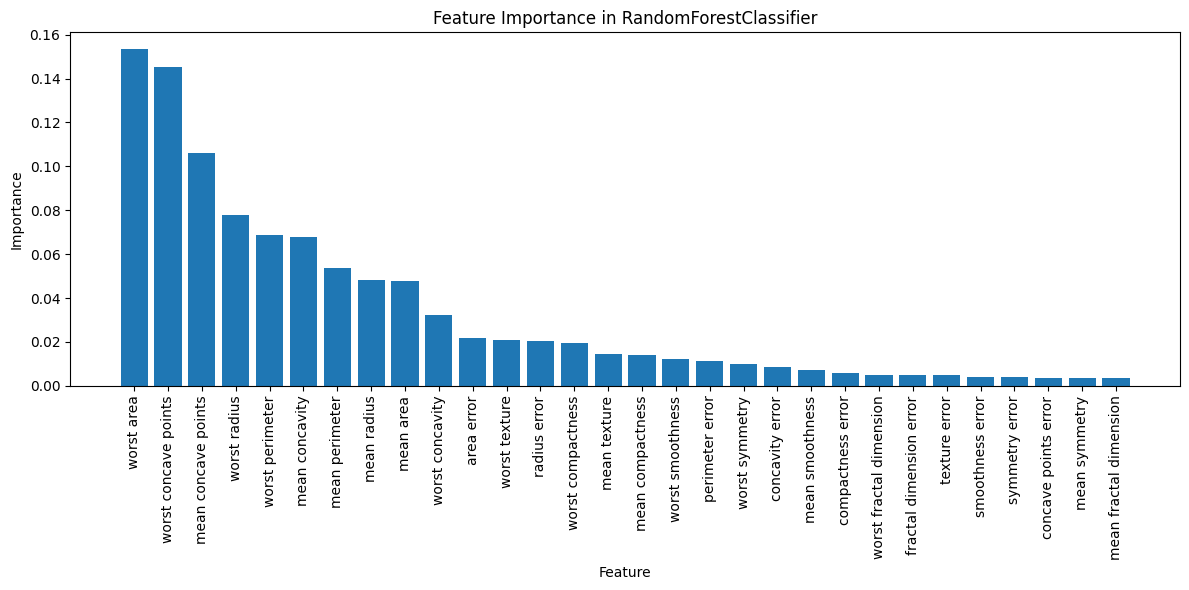

In [47]:
import matplotlib.pyplot as plt
import numpy as np
feature_importances = rf_classifier_best.feature_importances_
importances_df = pd.DataFrame({'Feature': cancer.feature_names, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(importances_df.shape[0]), importances_df['Importance'], align='center')
plt.xticks(range(importances_df.shape[0]), importances_df['Feature'], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in RandomForestClassifier')
plt.tight_layout()
plt.show()
